# Example cases of SDSS query

In [18]:
# imports
from importlib import reload

import requests
from io import StringIO, BytesIO
from PIL import Image

from matplotlib import pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units

from astroquery.sdss import SDSS

from rf_meta_query import images
from rf_meta_query import sdss
from rf_meta_query import frb_cand
from rf_meta_query import meta_io

## Test RA/DEC

In [2]:
coord = SkyCoord('J081240.68+320809.0', unit=(units.hourangle, units.deg))

In [3]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (123.1695, 32.13583333)>

## Generate an FRB candidate object

In [8]:
frbc = frb_cand.build_frb_cand(coord.ra.value, coord.dec.value)

## Do a query

### Other Parameters

In [5]:
radius=0.5*units.arcmin
timeout = 30. # seconds

### Query

In [10]:
catalog = sdss.get_catalog(frbc['coord'], radius=radius)

/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
catalog

ra,dec,objid,run,rerun,camcol,field,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,z,z_error,separation
float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
123.169534700537,32.1357193228256,1237657775537520843,2864,301,4,106,19.67062,17.91037,17.51346,17.33699,17.18128,0.03277,0.004750669,0.0045466,0.00519813,0.01630831,-9999.0,-9999.0,0.4238504178923679
123.169534700537,32.1357193228256,1237657775537520842,2864,301,4,106,19.28115,17.74466,17.31748,17.08764,16.66548,0.1677273,0.02521392,0.07739115,0.0460808,0.1487736,-9999.0,-9999.0,0.4238504178923679
123.169546582556,32.1357212395852,1237657775537520841,2864,301,4,106,19.16389,17.66305,17.32551,17.16616,16.52074,0.176444,0.04300211,0.07475483,0.02923543,0.1569496,-9999.0,-9999.0,0.4277940279535372
123.16766122946,32.1342384031541,1237657775537520844,2864,301,4,106,22.96884,20.75422,19.72793,19.28872,19.14515,0.466078,0.03331742,0.02162988,0.02281602,0.08342973,-9999.0,-9999.0,8.024248842946777
123.172015412492,32.132939000809,1237657775537520840,2864,301,4,106,23.32122,20.10976,18.96083,18.33432,18.07801,0.6996557,0.02105831,0.01282861,0.01130248,0.03654314,-9999.0,-9999.0,12.9371347404734
123.172027293728,32.1329409363786,1237657775537520839,2864,301,4,106,23.46308,20.06863,18.95946,18.33715,18.02495,0.7732494,0.02040411,0.01278766,0.01129261,0.03469409,-9999.0,-9999.0,12.95303394951709
123.175444741424,32.1322632481266,1237657775537521851,2864,301,4,106,24.71429,23.49401,22.45763,21.76819,21.28895,2.579592,0.8131505,0.6159594,0.4157056,1.134642,0.361525,0.06386,22.217307023628287
123.168282937797,32.1294679619694,1237657775537521841,2864,301,4,106,27.7445,26.52192,22.61738,24.16709,24.02173,0.2975118,0.9685107,0.6378359,2.562266,1.713091,0.411272,0.089966,23.21376295122211
123.164542142531,32.1412005263838,1237657775537520845,2864,301,4,106,22.06848,19.63814,18.21876,17.18122,16.64994,0.2240221,0.01390511,0.006994893,0.004653853,0.01070175,-9999.0,-9999.0,24.530538767399694


## Grab an image

### Generate URL

In [12]:
imsize = 1. # arcmin
sdss_url = sdss.get_url(frbc['coord'], imsize)
sdss_url

'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=123.16949999999999&dec=32.13583333333333&scale=0.39612&width=3&height=3&query='

### Grab it

In [15]:
img = images.grab_from_url(sdss_url)

### Plot me

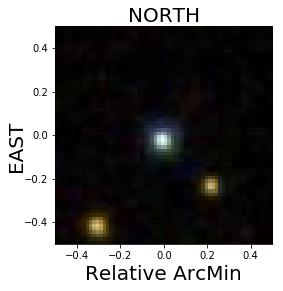

In [16]:
plt.clf()
plt.imshow(img,aspect='equal',extent=(-imsize/2., imsize/2, -imsize/2.,imsize/2))
# Label me
plt.xlabel('Relative ArcMin', fontsize=20)
xpos = 0.22*imsize
ypos = 0.02*imsize
plt.text(-imsize/2.-xpos, 0., 'EAST', rotation=90.,fontsize=20)
plt.text(0.,imsize/2.+ypos, 'NORTH', fontsize=20, horizontalalignment='center')
plt.savefig('tst.png', dpi=300)
#
plt.show()

## Write

In [17]:
# Prep plot
plt = images.gen_snapshot_plt(img, imsize)

In [20]:
meta_io.save_plt(plt, './', 'sdss_snap', verbose=True)

Wrote: ./sdss_snap.png
